### Silvio Orozco Vizquerra 18282 <br> Universidad del Valle de Guatemala <br> Análisis de Algoritmos



# Proyecto Algoritmo MTF

Primero desarrollamos la clase MoveToFrontList que nos permitirá mantener el estado de la lista, al igual que insertar elementos, buscar un elemento o buscar una secuencia de elementos que nos brindará más detalle sobre los costos y cambios en configuración.

In [1]:
import pandas as pd  #To print easily our results

#Implementation of MoveToFrontList
class MoveToFrontList:
    def __init__(self, initialConfig=[0,1,2,3,4]):
        self.listConfig = initialConfig
    
    def __str__(self):
        return str(self.listConfig)

    def insertItem(self,item):
        self.listConfig.append(item)
        return self.listConfig
    
    def searchItem(self,item):
        initConfig = self.listConfig
        index = self.listConfig.index(item);
        cost = index + 1
        finalConfig=[initConfig[index]] + initConfig[0:index] + initConfig[(index+1):len(initConfig)]
        self.listConfig = finalConfig
        return initConfig,index,cost,finalConfig

    def searchListOfItems(self,searchList):
        totalCost = 0 
        initConfigs=[]
        indexes=[]
        costs=[]
        finalConfigs=[]
        for item in searchList:
            initConfig,index,cost,finalConfig = self.searchItem(item)
            initConfigs.append(str(initConfig))
            indexes.append(index)
            costs.append(cost)
            finalConfigs.append(str(finalConfig))
            totalCost = totalCost + cost
        df = pd.DataFrame({"Search Elem":searchList,"Initial Config":initConfigs,"Found Index":indexes,"Cost":costs,"Final Config":finalConfigs})  
        print(df)
        print(f'Total Cost {totalCost}')

a) Calcular el costo de acceso utilizando el algoritmo MTF para <br>
> a. Lista de configuración: 0, 1, 2, 3, 4 <br>
> b. Secuencia de solicitudes: 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4 <br>

Imprima la lista de configuración, la solicitud, su costo y la configuración de la lista aplicando MTF 
por cada solicitud en la secuencia y, al final, imprima el costo total de los accesos.

In [3]:
initConfig=[0, 1, 2, 3, 4]
mtf = MoveToFrontList()
searchList=[0, 1, 2, 3, 4,0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
print(f"Init Config {initConfig}")
print(f"Search List {searchList}")
print(f"Config change sequence")
mtf.searchListOfItems(searchList)

Init Config [0, 1, 2, 3, 4]
Search List [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
Config change sequence
    Search Elem   Initial Config  Found Index  Cost     Final Config
0             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
1             1  [0, 1, 2, 3, 4]            1     2  [1, 0, 2, 3, 4]
2             2  [1, 0, 2, 3, 4]            2     3  [2, 1, 0, 3, 4]
3             3  [2, 1, 0, 3, 4]            3     4  [3, 2, 1, 0, 4]
4             4  [3, 2, 1, 0, 4]            4     5  [4, 3, 2, 1, 0]
5             0  [4, 3, 2, 1, 0]            4     5  [0, 4, 3, 2, 1]
6             1  [0, 4, 3, 2, 1]            4     5  [1, 0, 4, 3, 2]
7             2  [1, 0, 4, 3, 2]            4     5  [2, 1, 0, 4, 3]
8             3  [2, 1, 0, 4, 3]            4     5  [3, 2, 1, 0, 4]
9             4  [3, 2, 1, 0, 4]            4     5  [4, 3, 2, 1, 0]
10            0  [4, 3, 2, 1, 0]            4     5  [0, 4, 3, 2, 1]
11            1  [0, 4, 3, 2, 1]            4   

b) Calcular el costo de acceso utilizando el algoritmo MTF para
> a. Lista de configuración: 0, 1, 2, 3, 4 <br>
> b. Secuencia de solicitudes: 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4

Imprima la lista de configuración, la solicitud, su costo y la configuración de la lista aplicando MTF
por cada solicitud en la secuencia y, al final, imprima el costo total de los accesos.

In [4]:
initConfig=[0, 1, 2, 3, 4]
mtf = MoveToFrontList()
searchList=[4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4]
print(f"Init Config {initConfig}")
print(f"Search List {searchList}")
print(f"Config change sequence")
mtf.searchListOfItems(searchList)

Init Config [0, 1, 2, 3, 4]
Search List [4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4]
Config change sequence
    Search Elem   Initial Config  Found Index  Cost     Final Config
0             4  [0, 1, 2, 3, 4]            4     5  [4, 0, 1, 2, 3]
1             3  [4, 0, 1, 2, 3]            4     5  [3, 4, 0, 1, 2]
2             2  [3, 4, 0, 1, 2]            4     5  [2, 3, 4, 0, 1]
3             1  [2, 3, 4, 0, 1]            4     5  [1, 2, 3, 4, 0]
4             0  [1, 2, 3, 4, 0]            4     5  [0, 1, 2, 3, 4]
5             1  [0, 1, 2, 3, 4]            1     2  [1, 0, 2, 3, 4]
6             2  [1, 0, 2, 3, 4]            2     3  [2, 1, 0, 3, 4]
7             3  [2, 1, 0, 3, 4]            3     4  [3, 2, 1, 0, 4]
8             4  [3, 2, 1, 0, 4]            4     5  [4, 3, 2, 1, 0]
9             3  [4, 3, 2, 1, 0]            1     2  [3, 4, 2, 1, 0]
10            2  [3, 4, 2, 1, 0]            2     3  [2, 3, 4, 1, 0]
11            1  [2, 3, 4, 1, 0]            3     4  [1, 

c) ¿Para qué secuencia de 20 solicitudes se obtiene el mínimo costo total de acceso utilizando el
algoritmo MTF para la configuración 0, 1, 2, 3, 4? ¿Cuál sería ese costo total de acceso? <br>
Como vemos la secuencia con la que obtendremos el mínimo costo será cuando consultemos únicamente el primer elemento de nuestra configuración inicial las 20 solicitudes. En este caso sería entonces consultar el número 0 20 veces ya que producirá la consulta de menor costo (1) las 20 veces. El costo total será de 20.

In [6]:
initConfig=[0, 1, 2, 3, 4]
mtf = MoveToFrontList()
searchList=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]
print(f"Init Config {initConfig}")
print(f"Search List {searchList}")
print(f"Config change sequence")
mtf.searchListOfItems(searchList)

Init Config [0, 1, 2, 3, 4]
Search List [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Config change sequence
    Search Elem   Initial Config  Found Index  Cost     Final Config
0             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
1             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
2             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
3             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
4             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
5             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
6             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
7             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
8             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
9             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
10            0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
11            0  [0, 1, 2, 3, 4]            0   

d) ¿Para qué secuencia de 20 solicitudes se obtiene el peor de los casos utilizando el algoritmo MTF
para la configuración 0, 1, 2, 3, 4? ¿Cuál sería ese costo total de acceso? <br>
Ahora para pensar en el peor de los casos de una configuración inicial de 5 números entonces el peor costo posible para una sola búsqueda es de 5. Por lo tanto, podemos pensar en el peor de los casos justamente cuando este costo sucede las 20 veces. La secuencia será entonces la configuración inicial en orden inverso y repetidamente para siempre consultar el último elemento. Lo anterior servirá para que siempre consulte el último elemento de nuestra lista. Por lo tanto, el costo final será de 20*5 = 100.

In [8]:
initConfig=[0, 1, 2, 3, 4]
mtf = MoveToFrontList()
searchList=[4,3,2,1,0,4,3,2,1,0,4,3,2,1,0,4,3,2,1,0]
print(f"Init Config {initConfig}")
print(f"Search List {searchList}")
print(f"Config change sequence")
mtf.searchListOfItems(searchList)

Init Config [0, 1, 2, 3, 4]
Search List [4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 4, 3, 2, 1, 0]
Config change sequence
    Search Elem   Initial Config  Found Index  Cost     Final Config
0             4  [0, 1, 2, 3, 4]            4     5  [4, 0, 1, 2, 3]
1             3  [4, 0, 1, 2, 3]            4     5  [3, 4, 0, 1, 2]
2             2  [3, 4, 0, 1, 2]            4     5  [2, 3, 4, 0, 1]
3             1  [2, 3, 4, 0, 1]            4     5  [1, 2, 3, 4, 0]
4             0  [1, 2, 3, 4, 0]            4     5  [0, 1, 2, 3, 4]
5             4  [0, 1, 2, 3, 4]            4     5  [4, 0, 1, 2, 3]
6             3  [4, 0, 1, 2, 3]            4     5  [3, 4, 0, 1, 2]
7             2  [3, 4, 0, 1, 2]            4     5  [2, 3, 4, 0, 1]
8             1  [2, 3, 4, 0, 1]            4     5  [1, 2, 3, 4, 0]
9             0  [1, 2, 3, 4, 0]            4     5  [0, 1, 2, 3, 4]
10            4  [0, 1, 2, 3, 4]            4     5  [4, 0, 1, 2, 3]
11            3  [4, 0, 1, 2, 3]            4   

e) Calcular el costo de acceso utilizando el algoritmo MTF para
> a. Lista de configuración: 0, 1, 2, 3, 4 <br>
> b. Secuencia de solicitudes: 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2
El costo es 22.

<br>
Imprima la lista de configuración, la solicitud, su costo y la configuración de la lista aplicando MTF
por cada secuencia de solicitudes y al final el costo total de acceso, Si se hiciera la secuencia de
solicitudes 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3. ¿Cuál es el costo total de acceso? El costo es 23.
<br><br>
¿Cuál sería la fórmula para calcular el costo de 𝑛 solicitudes del mismo elemento si éste se
encuentra inicialmente en la 𝑘-ésma posición de la lista de configuración?
<br>
Como podemos observar todas las solicitudes a partir de la segunda tienen un costo de 1 porque la primera vez que hacemos la búsqueda trae nuestro elemento al inicio y luego al seguirlo consultando se mantiene en esta posición. Lo que cambia es el costo de esta primera consulta y está dado por la posición inicial de elemento que se consulta. Si sabemos que está en la k-ésima posición siendo la posición 0 del arreglo correspondiente a la posición 1 en lenguaje humano, entonces la fórmula es la siguiente:
<br>
costo(k,n) = k+(n-1).
Por ejemplo para 2 que se encuentra en la posición 3 para 20 consultas será 3+(20-1)=22. Justo como lo calculamos con el algoritmo.

In [10]:
initConfig=[0, 1, 2, 3, 4]
mtf = MoveToFrontList()
searchList=[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
print(f"Init Config {initConfig}")
print(f"Search List {searchList}")
print(f"Config change sequence")
mtf.searchListOfItems(searchList)

Init Config [0, 1, 2, 3, 4]
Search List [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Config change sequence
    Search Elem   Initial Config  Found Index  Cost     Final Config
0             2  [0, 1, 2, 3, 4]            2     3  [2, 0, 1, 3, 4]
1             2  [2, 0, 1, 3, 4]            0     1  [2, 0, 1, 3, 4]
2             2  [2, 0, 1, 3, 4]            0     1  [2, 0, 1, 3, 4]
3             2  [2, 0, 1, 3, 4]            0     1  [2, 0, 1, 3, 4]
4             2  [2, 0, 1, 3, 4]            0     1  [2, 0, 1, 3, 4]
5             2  [2, 0, 1, 3, 4]            0     1  [2, 0, 1, 3, 4]
6             2  [2, 0, 1, 3, 4]            0     1  [2, 0, 1, 3, 4]
7             2  [2, 0, 1, 3, 4]            0     1  [2, 0, 1, 3, 4]
8             2  [2, 0, 1, 3, 4]            0     1  [2, 0, 1, 3, 4]
9             2  [2, 0, 1, 3, 4]            0     1  [2, 0, 1, 3, 4]
10            2  [2, 0, 1, 3, 4]            0     1  [2, 0, 1, 3, 4]
11            2  [2, 0, 1, 3, 4]            0   

In [12]:
initConfig=[0, 1, 2, 3, 4]
mtf = MoveToFrontList()
searchList=[3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
print(f"Init Config {initConfig}")
print(f"Search List {searchList}")
print(f"Config change sequence")
mtf.searchListOfItems(searchList)

Init Config [0, 1, 2, 3, 4]
Search List [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Config change sequence
    Search Elem   Initial Config  Found Index  Cost     Final Config
0             3  [0, 1, 2, 3, 4]            3     4  [3, 0, 1, 2, 4]
1             3  [3, 0, 1, 2, 4]            0     1  [3, 0, 1, 2, 4]
2             3  [3, 0, 1, 2, 4]            0     1  [3, 0, 1, 2, 4]
3             3  [3, 0, 1, 2, 4]            0     1  [3, 0, 1, 2, 4]
4             3  [3, 0, 1, 2, 4]            0     1  [3, 0, 1, 2, 4]
5             3  [3, 0, 1, 2, 4]            0     1  [3, 0, 1, 2, 4]
6             3  [3, 0, 1, 2, 4]            0     1  [3, 0, 1, 2, 4]
7             3  [3, 0, 1, 2, 4]            0     1  [3, 0, 1, 2, 4]
8             3  [3, 0, 1, 2, 4]            0     1  [3, 0, 1, 2, 4]
9             3  [3, 0, 1, 2, 4]            0     1  [3, 0, 1, 2, 4]
10            3  [3, 0, 1, 2, 4]            0     1  [3, 0, 1, 2, 4]
11            3  [3, 0, 1, 2, 4]            0   

f) Se plantea un algoritmo mejorado de MTF: IMTF por Rakesh Mohanty y Sasmita Tripathy, basado
en el concepto de mirada hacia adelante (look-ahead), en el cual, después de acceder al elemento
de la posición 𝑖 en la lista de configuración, se mueve el elemento al frente de la lista si y sólo si
este elemento aparece entre las próximas 𝑖 − 1 solicitudes de la secuencia. En caso contrario, el
elemento accedido no se mueve al frente de la lista de configuración.
Usando la misma lista de configuración que en los incisos anteriores, considere las secuencias de
solicitudes que producen los costos máximos y mínimos usando MTF. Para cada una de estas
secuencias, imprima la lista de configuración, la solicitud, su costo y la configuración de la lista
aplicando IMTF por cada solicitud.

<br>
Primero definimos nuestra nueva clase IMoveToFrontList con la nueva condición de después de acceder al elemento
de la posición 𝑖 en la lista de configuración, se mueve el elemento al frente de la lista si y sólo si
este elemento aparece entre las próximas 𝑖 − 1 solicitudes de la secuencia. En caso contrario, el
elemento accedido no se mueve al frente de la lista de configuración

In [21]:
import pandas as pd  #To print easily our results

#Implementation of IMoveToFrontList
class IMoveToFrontList:
    def __init__(self, initialConfig=[0,1,2,3,4]):
        self.listConfig = initialConfig
    
    def __str__(self):
        return str(self.listConfig)

    def insertItem(self,item):
        self.listConfig.append(item)
        return self.listConfig
    
    def searchItem(self,item,indexSearch,searchList):
        initConfig = self.listConfig
        index = self.listConfig.index(item);
        cost = index + 1
        finalConfig = initConfig
        if(self.listConfig[index] in searchList[indexSearch+1:indexSearch+index+1]):
            finalConfig=[initConfig[index]] + initConfig[0:index] + initConfig[(index+1):len(initConfig)]
        self.listConfig = finalConfig
        return initConfig,index,cost,finalConfig

    def searchListOfItems(self,searchList):
        totalCost = 0 
        initConfigs=[]
        indexes=[]
        costs=[]
        finalConfigs=[]
        for indexSearch in range(len(searchList)):
            item = searchList[indexSearch]
            initConfig,index,cost,finalConfig = self.searchItem(item,indexSearch,searchList)
            initConfigs.append(str(initConfig))
            indexes.append(index)
            costs.append(cost)
            finalConfigs.append(str(finalConfig))
            totalCost = totalCost + cost
        df = pd.DataFrame({"Search Elem":searchList,"Initial Config":initConfigs,"Found Index":indexes,"Cost":costs,"Final Config":finalConfigs})  
        print(df)
        print(f'Total Cost {totalCost}')
            

Ahora realizamos el mismo análisis de costos sobre las solicitudes de c) y d)

In [22]:
#c) Misma configuracion y solicitudes del inciso c con IMTF obteniendo el mismo costo para el best case siendo el costo minimo
initConfig=[0, 1, 2, 3, 4]
imtf = IMoveToFrontList()
searchList=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]
print(f"Init Config {initConfig}")
print(f"Search List {searchList}")
print(f"Config change sequence")
imtf.searchListOfItems(searchList)

Init Config [0, 1, 2, 3, 4]
Search List [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Config change sequence
    Search Elem   Initial Config  Found Index  Cost     Final Config
0             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
1             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
2             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
3             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
4             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
5             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
6             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
7             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
8             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
9             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
10            0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
11            0  [0, 1, 2, 3, 4]            0   

In [24]:
#d) Misma configuracion y solicitudes del inciso d con IMTF obteniendo un mejor costo para este worst case scenario con un 60 porque se mejora con el look ahead
initConfig=[0, 1, 2, 3, 4]
imtf = IMoveToFrontList()
searchList=[4,3,2,1,0,4,3,2,1,0,4,3,2,1,0,4,3,2,1,0]
print(f"Init Config {initConfig}")
print(f"Search List {searchList}")
print(f"Config change sequence")
imtf.searchListOfItems(searchList)

Init Config [0, 1, 2, 3, 4]
Search List [4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 4, 3, 2, 1, 0, 4, 3, 2, 1, 0]
Config change sequence
    Search Elem   Initial Config  Found Index  Cost     Final Config
0             4  [0, 1, 2, 3, 4]            4     5  [0, 1, 2, 3, 4]
1             3  [0, 1, 2, 3, 4]            3     4  [0, 1, 2, 3, 4]
2             2  [0, 1, 2, 3, 4]            2     3  [0, 1, 2, 3, 4]
3             1  [0, 1, 2, 3, 4]            1     2  [0, 1, 2, 3, 4]
4             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
5             4  [0, 1, 2, 3, 4]            4     5  [0, 1, 2, 3, 4]
6             3  [0, 1, 2, 3, 4]            3     4  [0, 1, 2, 3, 4]
7             2  [0, 1, 2, 3, 4]            2     3  [0, 1, 2, 3, 4]
8             1  [0, 1, 2, 3, 4]            1     2  [0, 1, 2, 3, 4]
9             0  [0, 1, 2, 3, 4]            0     1  [0, 1, 2, 3, 4]
10            4  [0, 1, 2, 3, 4]            4     5  [0, 1, 2, 3, 4]
11            3  [0, 1, 2, 3, 4]            3   

g) ¿Cuál es la diferencia entre un algoritmo online y uno offline? ¿Cambiarían en algo su desempeño
o su comportamiento MTF e IMTF si se usaran como algoritmos online (considere el efecto de
diferentes secuencias de solicitudes)? Investigue y describa al menos un algoritmo adicional que
sea online y que sirva para atender una secuencia de solicitudes de accesos

Un algoritmo online es aquel que recibe una secuencia de solicitudes y realiza una acción inmediata luego de cada solicitud. Este se va desarrollando cada solicitud sin necesariamente tener un input completo desde el inicio. Por el contrario, un algoritmo offline es un algoritmo que recibe la secuencia entera de solicitudes desde el comienzo y al conocer el "futuro" (in advance) puede basar su decisión o acción en la secuencia completa de solicitudes. En pocas palabras, el online no conoce el futuro mientras que el offline si. 

Por lo tanto, si el algoritmo actual de MTF pasará a ser online realmente no cambiaría ya que no necesita ver la cadena futura con la que interactuará para tomar una acción en la búsqueda dentro de la lista. Esto porque no importando la secuencia futura este siempre mueve hacia la primera posición el elemento recien consultado. En cambio, el algoritmo IMTF si necesita conocer la secuencia futura dado que para decidir si mueve el elemento recien consultado hacia la posición inicial necesita consultar las futuras solicitudes que se realizarán a la lista de forma que con esto pueda tomar una acción y decisión. El algoritmo IMTF entonces si se vería afectado ya que como se mencionó anteriormente, necesita conocer del futuro de la secuencia (Karp,1992).

Podemos concluir que es más fácil optimizar en offline algorithms que en online algoritmos ya que con el primero podemos identificar mejores formas de consultas para minimizar los costos ya que conocemos todas las solicitudes desde el inicio mientras que con los online algorithms al no conocer el futuro podría existir una secuencia de futuras solicitudes que no contemple correctamente nuestro algoritmo.
<br>
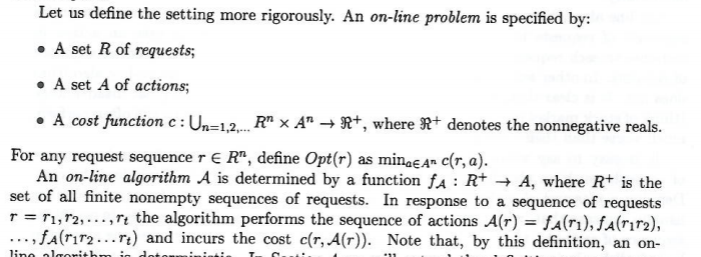
<br>

Un ejemplo de un online algorithm se da en Ski Rental Problem. El problema es el siguiente: Una persona ha comenzado a esquiar. Se pueden rentar skis por $50 o se pueden comprar por $500. Al no saber si le gustará esquiar, decide rentar. Luego, decide seguir esquiando tanto que no se da cuenta que se ha gastado todo su dinero rentando tanto que hubiera sido mejor comprar sus skis desde el inicio en lugar de rentar. Podríamos asimilar este problema también a cuando uno va a los juegos del IRTRA. Uno puede comprar un brazelete para subirse a todos los juegos por Q50 o comprar pasaportes que te cobran Q5 por juego. Es decir, si nos subimos a más de 10 juegos conviene más comprar el brazalete y sino comprar un pasaporte. El problema es cuando no sabemos qué pasará en el futuro, como por ejemplo si va a llover y no nos dará tiempo de subirnos a tantos juegos, por lo que no sabemos cuál podría ser la mejor decisión.
<br>

Para lo anterior, se calcula un competitive ratio que el worst case es 
ALG(σ)/OPT(σ), where ALG(σ) represents the cost of
ALG on σ and OPT(σ) is the least possible cost on σ (Karp,1992).
<br>

Un algoritmo entonces podría ser Comprar de inmediato que tendría un worst case de gastar 500 y solo utilizarlos una vez 500/10 =10.
Otro algoritmo podría ser Rentar Siempre que su worst case scenario podría ser infinito. 
El algoritmo ideal que nos muestra Karp es better late than never. En este es rentar hasta el momento que te das cuenta que tuviste que haber comprado. Es decir, rentar 9 veces y luego comprar. Este tiene un competitive ratio menor a 2 porque entonces rentaremos 500/100 -1 veces y si el costo de comprar es un multiplo de la renta entonces el competive ratio será 2-r/p.
<br>

La prueba que el competitive ratio es menor a 2, se da al verificar que tenemos 2 casos:
1. Si vamos 9 o menos  veces, entonces optimizamos porque nunca compramos y solo pagamos lo de renta.
2. Si vamos 9 o más veces, lo ideal hubiese sido comprar al inicio entonces el optimo era el precio de compra p. Pero ahora pagaremos r(p/r-1)+´p lo cual siempre será menora 2p. 
<br>

Referencias:
Karp, Richard M. (1992). "On-line algorithms versus off-line algorithms: How much is it worth to know the future?" . IFIP Congress (1). 12: 416–429. 
Geeks for Geeks. (2020). Online Algorithm. Recuperado de https://www.geeksforgeeks.org/online-algorithm/ 